In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Impor dataset MNIST dari TensorFlow
mnist = keras.datasets.mnist

# Memisahkan dataset menjadi data latih dan data uji
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalisasi data
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 4s 0us/step


In [2]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.2),  # Dropout layer
    keras.layers.Dense(10, activation='softmax')  
])

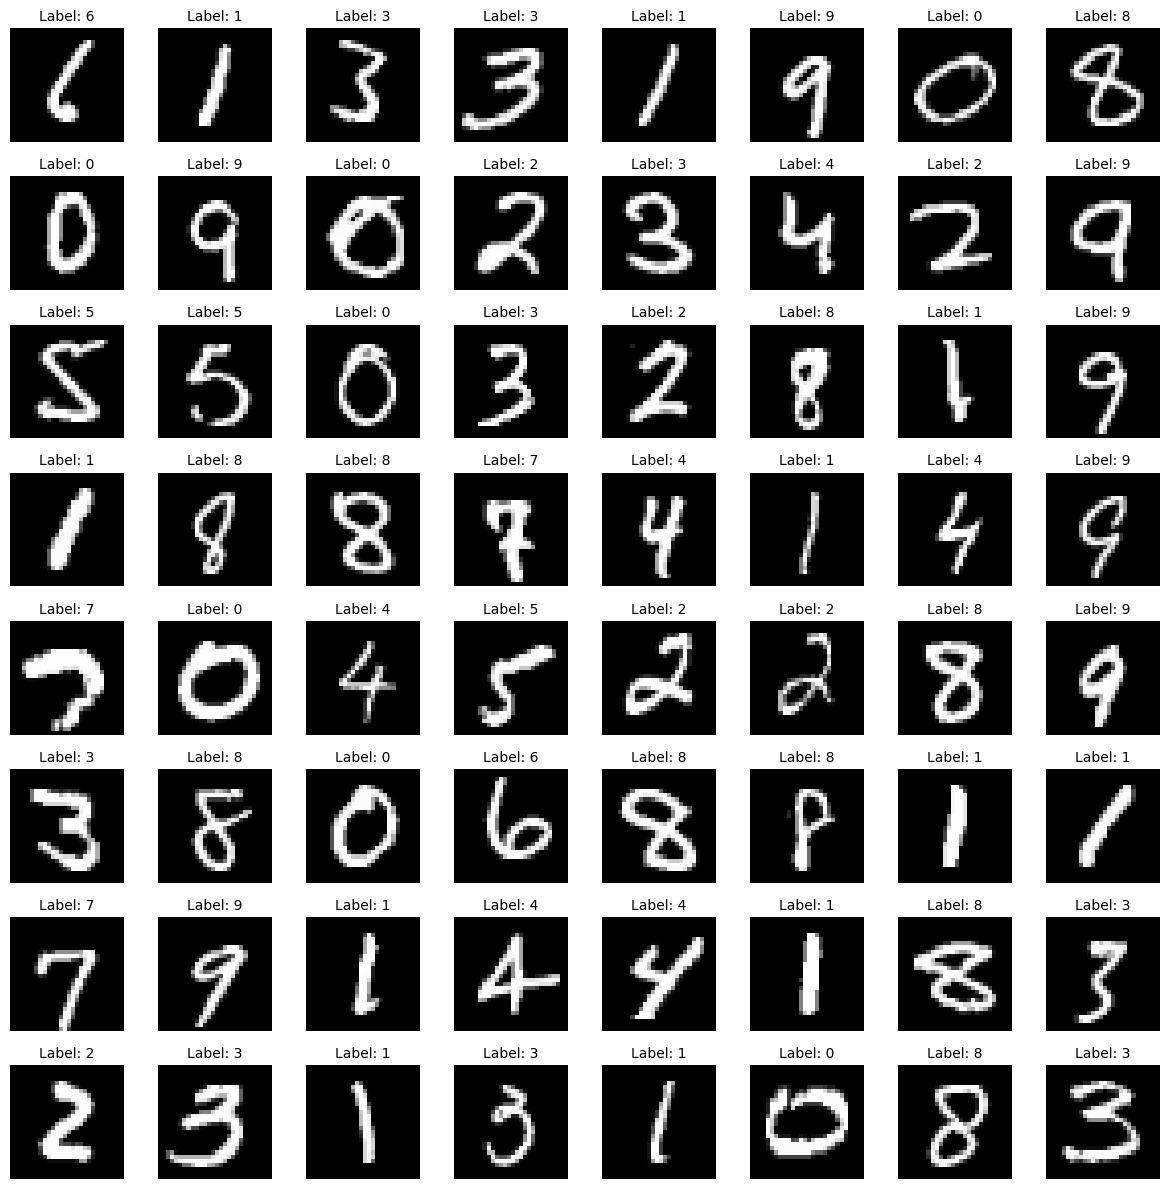

In [3]:
import matplotlib.pyplot as plt

num_images = 64  

# Memilih contoh gambar secara acak 
random_indices = np.random.choice(len(train_images), num_images, replace=False)
sample_images = train_images[random_indices]
sample_labels = train_labels[random_indices]

# Menghitung jumlah baris dan kolom 
grid_size = int(np.ceil(np.sqrt(num_images)))

# Menampilkan gambar 
fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(sample_images[i], cmap='gray')
        ax.set_title(f"Label: {sample_labels[i]}", fontsize=10)
        ax.axis('off')

plt.tight_layout()
plt.show()

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 6ms/step - loss: 0.2930 - accuracy: 0.9154
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1421 - accuracy: 0.9567
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1062 - accuracy: 0.9676
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0864 - accuracy: 0.9734
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0742 - accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0651 - accuracy: 0.9795
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0580 - accuracy: 0.9812
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0513 - accuracy: 0.9832
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0461 - accuracy: 0.9845
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Akurasi data: {test_acc:.2f}')

# Prediksi data uji
predictions = model.predict(test_images)

predicted_labels = [tf.argmax(prediction).numpy() for prediction in predictions]

313/313 [==============================] - 2s 4ms/step - loss: 0.0759 - accuracy: 0.9784
Akurasi data: 0.98
313/313 [==============================] - 1s 4ms/step


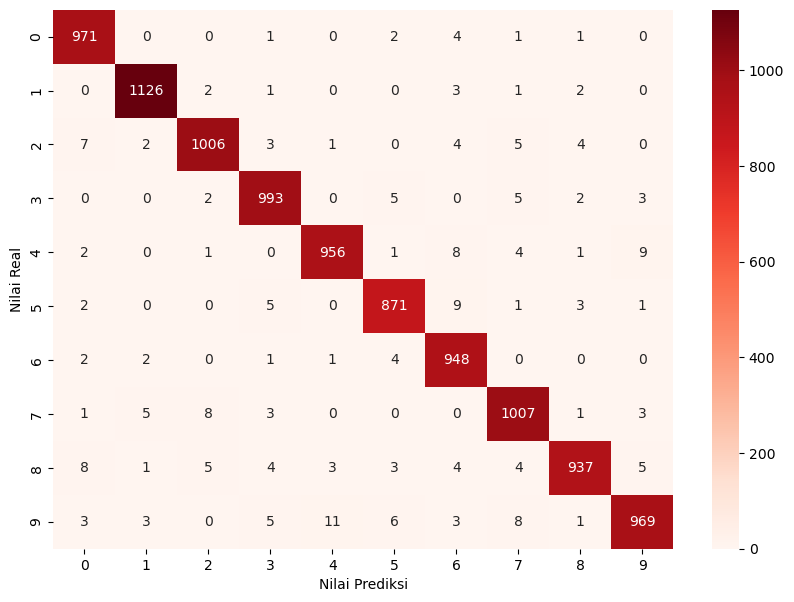

In [7]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Nilai Prediksi')
plt.ylabel('Nilai Real')
plt.show()